### step 1 : import necessary libraries

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step 2 : load dataset

In [3]:
#load dataset
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### step 3 : data preprocessing

In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#drop unnecessary columns
data = data.drop(columns = ['CustomerID', 'Gender'])

step 4 : eda

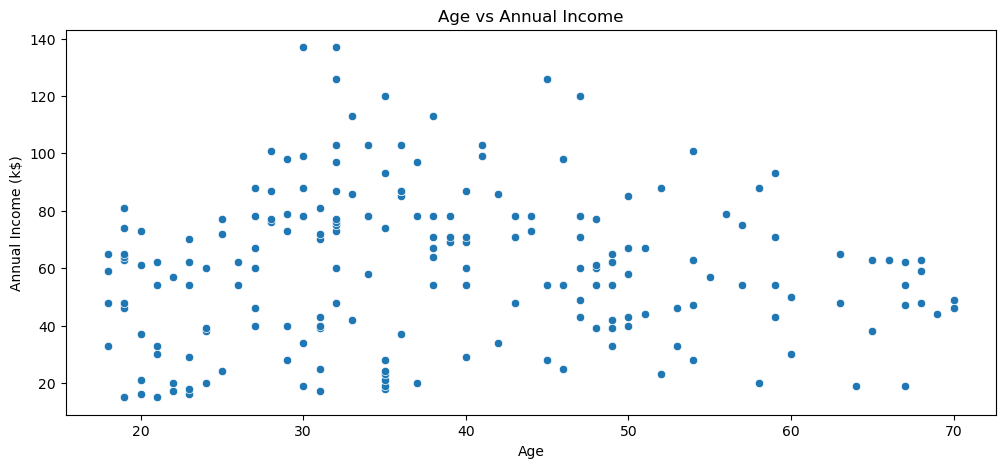

In [10]:
#plotting the distribution of Age and Annual Income
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data)
plt.title('Age vs Annual Income')
plt.show()

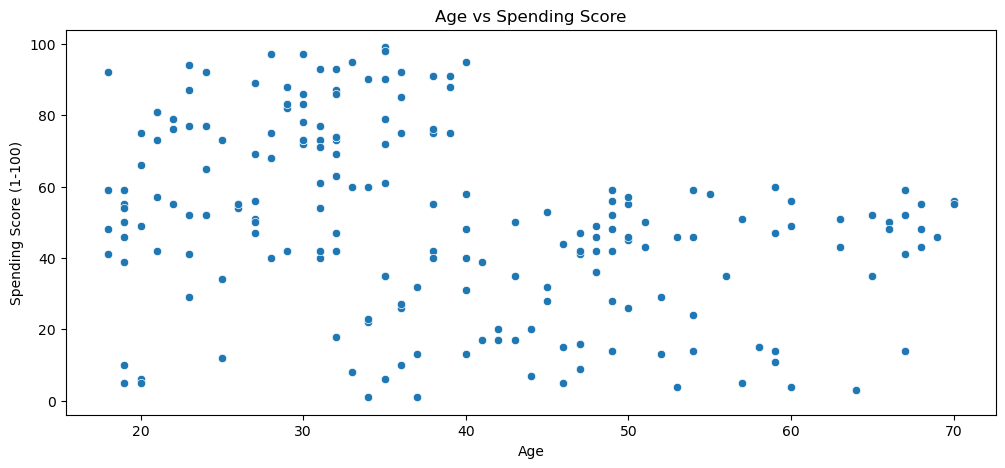

In [11]:
#plotting the distribution of Age and Spending Score
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data)
plt.title('Age vs Spending Score')
plt.show()

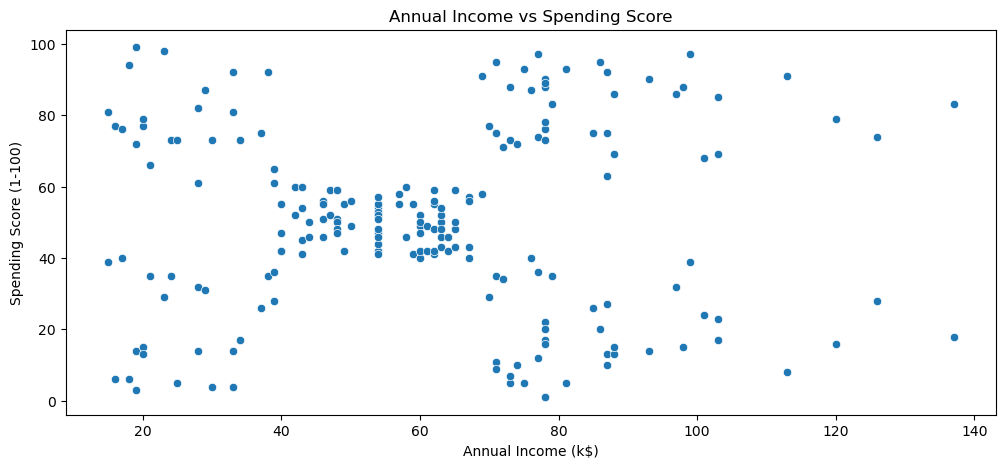

In [12]:
#plotting distribution of Annual Income and Spending Score
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Annual Income vs Spending Score')
plt.show()

### step 5 : feature engineering

In [13]:
# find skewness of the data and display left, right and no skewness
def skewness_label(data):
    s = data.skew()
    if s < 0:
        return "left-skewed"
    elif s > 0:
        return "right-skewed"
    else:
        return "approximately symmetric (no skewness)"

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    s = data[col].skew()
    print(f"{col} skewness: {s:.2f} ({skewness_label(data[col])})")

Age skewness: 0.49 (right-skewed)
Annual Income (k$) skewness: 0.32 (right-skewed)
Spending Score (1-100) skewness: -0.05 (left-skewed)


In [14]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [15]:
#scdalling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### step 6 : train k means model

In [16]:
#training the KMeans model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)
model.fit(data)
data['Cluster'] = model.labels_
data.head()

c:\Users\bsais\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\bsais\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\bsais\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bsais\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

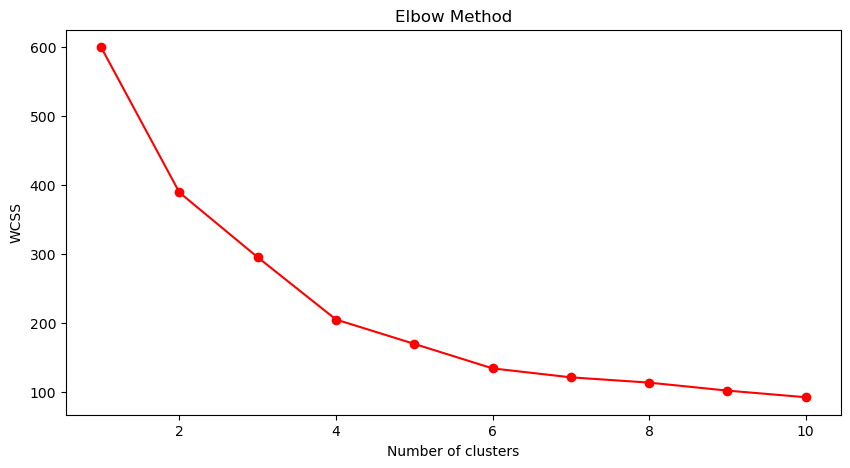

In [17]:
#check with elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data.drop(columns=['Cluster']))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

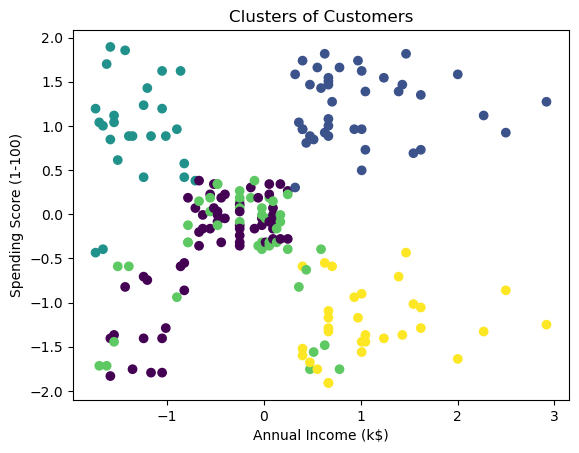

In [18]:
#displaying the clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'])
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [19]:
#save the file
data.to_csv('clustered_customers.csv', index=False)

In [20]:
#model to predict the cluster of a new customer
data1 = pd.read_csv('clustered_customers.csv')
data1.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [21]:
x = data1.drop(columns=['Cluster'])
y = data1['Cluster']

In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
#train the model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
#predicting the cluster of a new customer
new_customer = np.array([[40, 40, 40]])  # Example: Age=40, Annual Income=40k$, Spending Score=40
new_customer_scaled = scaler.transform(new_customer)
predicted_cluster = dt_model.predict(new_customer_scaled)
print(f"The new customer belongs to cluster: {predicted_cluster[0]}")

The new customer belongs to cluster: 3


c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [25]:
#metrics
from sklearn.metrics import accuracy_score
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.95

In [26]:
#save the model
import joblib
joblib.dump(dt_model, 'customer_cluster_model.pkl')

['customer_cluster_model.pkl']